In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [8]:
df = pd.read_csv('daily_food_nutrition_dataset.csv')
df = df[[
    # 'Date',
    # 'User_ID',
    'Food_Item',
    'Category',
    'Calories (kcal)',
    'Protein (g)',
    'Carbohydrates (g)',
    'Fat (g)',
    'Fiber (g)',
    'Sugars (g)',
    'Sodium (mg)',
    'Cholesterol (mg)',
    'Meal_Type',
    'Water_Intake (ml)'
    ]]
df.head()

,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,Lunch,478
1,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,Lunch,466
2,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,Breakfast,635
3,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,Snack,379
4,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,Lunch,471


In [10]:
df.describe()

,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
std,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642
min,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000


In [11]:
print(df["Category"].unique())  # Kategorie jedzenia  
print(df["Meal_Type"].unique())  # Typy posiłków  

['Meat' 'Fruits' 'Grains' 'Vegetables' 'Snacks' 'Beverages' 'Dairy']
['Lunch' 'Breakfast' 'Snack' 'Dinner']


In [12]:
df.groupby("Category")["Calories (kcal)"].mean()

Category
Beverages     332.231142
Dairy         320.671918
Fruits        329.162423
Grains        333.234104
Meat          325.011989
Snacks        332.157821
Vegetables    321.518466
Name: Calories (kcal), dtype: float64

In [13]:
df.nlargest(5, "Calories (kcal)")

,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
573,Popcorn,Snacks,600,46.4,50.3,3.8,4.2,14.9,947,183,Lunch,774
594,Grapes,Fruits,600,36.4,23.0,46.4,9.9,24.3,704,211,Lunch,375
1251,Salmon,Meat,600,44.5,84.9,6.8,2.5,48.0,458,128,Snack,897
1324,Green Tea,Beverages,600,19.6,97.4,25.9,4.1,3.2,187,265,Breakfast,824
2355,Popcorn,Snacks,600,27.1,58.4,35.9,5.3,40.3,213,117,Lunch,810


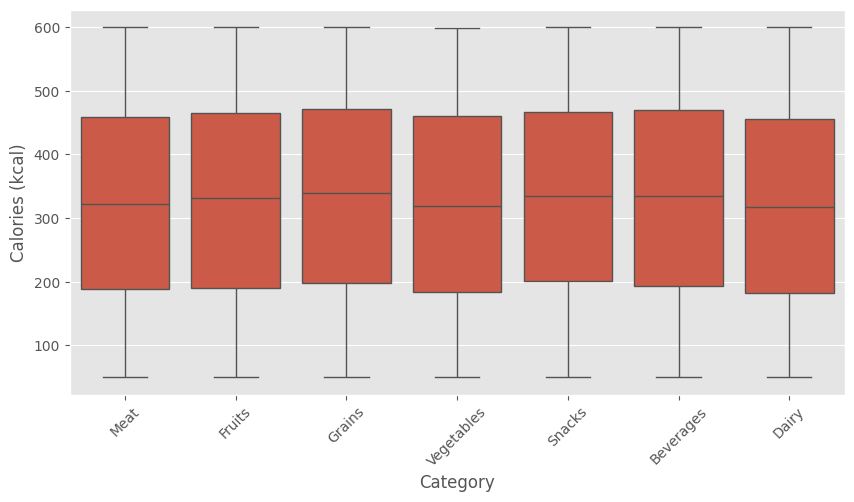

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Category", y="Calories (kcal)", data=df)
plt.xticks(rotation=45)
plt.show()

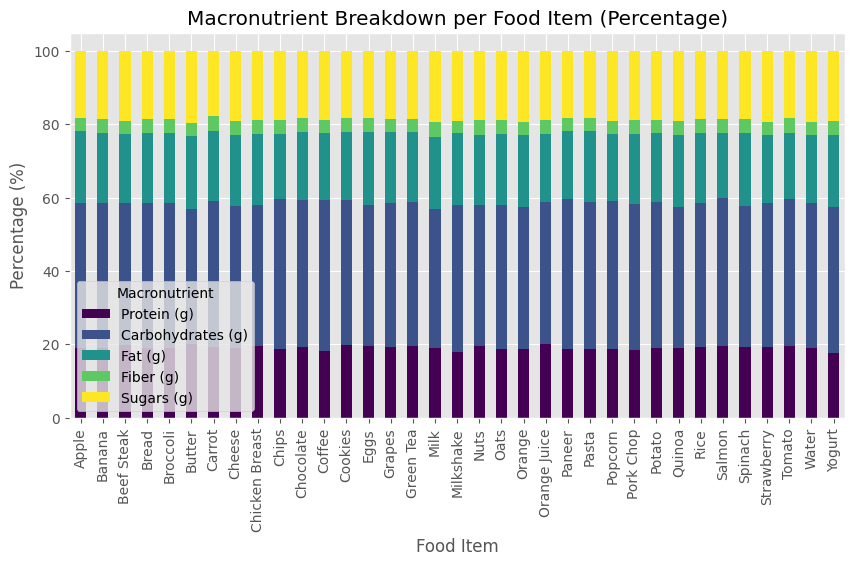

In [9]:
df_percent = df.groupby("Food_Item")[["Protein (g)", "Carbohydrates (g)", "Fat (g)", "Fiber (g)", "Sugars (g)"]].mean()

df_percent = df_percent.div(df_percent.sum(axis=1), axis=0) * 100

df_percent.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="viridis")
plt.ylabel("Percentage (%)")
plt.xlabel("Food Item")
plt.title("Macronutrient Breakdown per Food Item (Percentage)")
plt.legend(title="Macronutrient")
plt.show()

In [23]:
df_mean = df.groupby("Food_Item")[["Protein (g)", "Carbohydrates (g)", "Fat (g)", "Fiber (g)", "Sugars (g)"]].mean()
df_mean["Protein_to_Fat"] = df_mean["Protein (g)"] / df_mean["Fat (g)"]
df_mean.sort_values(by="Protein_to_Fat", ascending=False).head()

,Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Protein_to_Fat
Food_Item,,,,,,
Orange Juice,26.474503,50.478808,24.272185,5.111921,24.730795,1.090734
Salmon,26.344074,54.253333,24.207407,5.177407,24.862222,1.088265
Tomato,26.651172,54.501562,24.537500,5.366406,24.974219,1.086140
Cookies,27.651220,54.651568,25.895819,5.082927,25.588850,1.067787
Chips,25.064184,54.398582,23.509574,4.944326,25.111348,1.066127


In [20]:
df_mean.nlargest(5, "Fiber (g)")

,Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Protein_to_Fat
Food_Item,,,,,,
Tomato,26.651172,54.501562,24.537500,5.366406,24.974219,1.086140
Carrot,25.451495,52.848505,25.268106,5.291694,23.646179,1.007258
Oats,24.596310,51.645756,25.523247,5.286716,24.732841,0.963683
Milk,25.112219,49.599357,26.040193,5.217363,25.512219,0.964364
Nuts,25.185305,49.576703,24.770609,5.216129,24.297133,1.016741


In [26]:
df.groupby("Food_Item")[["Sugars (g)"]].mean().head()

,Sugars (g)
Food_Item,
Apple,24.839799
Banana,24.588339
Beef Steak,25.314894
Bread,25.288764
Broccoli,25.352500
